<h3>Introduction to Data Science 2024: Assignment 3</h3>
<h3>Bayesian Statistics and K-means clustering</h3>
<h4>Andrea Schröter, kbn999</h4>

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
#import pymc as pm

<h4> <b> Exercise 1 </b> </h4>

Bayesian statistics offers a valuable approach to speech recognition in both computational linguistics and as a model for human speech recognition. This is particularly advantageous due to the inherent noise and uncertainty present in speech signals. By leveraging Bayesian inference, we can effectively infer words from speech and acoustic signals, accounting for the noisy and uncertain nature of the data (cf. Chater and Manning 2006).

Suppose we aim to develop a virtual assistant capable of determining a word based on a user's speech input. We can model this scenario via Bayesian inference. Essentially, we want to determine a word W given a speech signal s composed of acoustic signals. This is captured with the following formula:

$p(W | s) = \frac{p(s | W) \cdot \pi(W)}{p(s)} \propto p(s | W) \cdot \pi(W)
$

Here, the posterior p(W | s) is the probability of a word W given the speech input s. We can calculate the posterior by taking into account the likelihood p(s|W), the prior $\pi(W)$ and the evidence p(s).

The prior $\pi(W)$ represents how likely the word is to appear in spoken language or more specifically, the likelihood of a word spoken by a user of the virtual assistant.$^{1}$ The likelihood p(s|W) reflects the probability of observing speech or the acoustic features s given a word W. The evidence p(s) represents the probability of observing the speech signal irrespective of the word W. The virtual assistant would then select the word with the highest posterior probability p(W|s).

$^{1}$ Note that this is an oversimplification, since word frequency alone is a weak prior given that other factors like the context or the syntactic structure can influence the prediction of a word (cf. Norris et al. 2016).


<h4> <b> Exercise 2 </b> </h4>

<b> Answer: </b>
<ul>
  <li>1. The evidence lower bound (ELBO) is a method used in variational Bayes inference that transforms intractable inference problems into approximation problems (Alemi et al. 2018). We seek to compute the log-likelihood or distribution of the observed data x given the models parameters theta ($\log p_{\theta}(x)$). However, the presence of latent variables that influence our data make the computation of the true distribution p intractable, so we have to approximate it. This approximation can be expressed as the expected value of the log likelihood of x with respect to the variational distribution q of a latent variable z given x and the parameters $\phi$ ($q_{\phi}(z|x)$). We want to minimize the difference between both distributions.</li>
    
  <li>2. This line of the equation is derived by making use of the product rule of probability: 
    
   p(x,z) = p(z|x)p(x) ==> p(x) = $\frac{p(x,z)}{p(z|x)}$ </li>
    
  <li>3. 
    This line can be derived by multiplying the numerator and the denominator by $q_{\phi}(z|x)$. </li>
    
  <li>4. 
    Here, we use the logarithm rule log(a*b) = log(a) + log(b) and the linearity of expectation E[a+b] = E[a] + E[b].
    We get the ELBO ($L_{\theta,\phi}(x)$) and the Kullback-Leibler (KL) divergence, a measure of distance between two probability distributions. Ultimately, we want to maximize ELBO which minimizes the KL divergence between our two distributions (cf. Hamelryck 2023). </li>
</ul> 

<h4> <b> Exercise 3 </b> </h4>


In [ ]:
# Define the model
with pm.Model() as model:
    # Register the data - useful for later predictions,
    # when we replace x to predict y
    x = pm.Data('x', x_data)
    y = pm.Data('y_obs', y_data)
    
    # Define priors
    # Slope
    a = pm.Normal("slope", mu=100, sigma=100)
    # Intercapt
    b = pm.Normal("intercept", mu=100, sigma=100)
    # Standard deviation - Note HalfNormal!
    s = pm.Normal("sigma", sigma=0.001)
    
    # Define the likelihood (note the "observed" argument, and mu=ax+b)
    likelihood = pm.Normal("y", mu=a*x + b, sigma=s)
    
    # Now we define the inference engine
    # We will sample from the posterior using MCMC (Hamiltonian MC, NUTS)
    step = pm.NUTs()
    
    # The trace variable contains the samples a,b,s ~ P(a,b,s|D)
    trace = pm.sample(1000, tune=1000, init=None, step=step, cores=2)

<b> Answer: </b>
<ul>
  <li>1. y = pm.Data('y_obs', y_data) --> Only x should be registered as data, not the labels y_obs.  </li>
  <li>2. a = pm.Normal("slope", mu=100, sigma=100) and b = pm.Normal("intercept", mu=100, sigma=100) --> Mu and sigma are extremely large for defining the priors for slope, intercept and standard deviation. It would be better to choose reasonable priors based on domain knwoledge or prior knowledge of the data at hand. The data however is unknown. </li>
  <li>3. likelihood = pm.Normal("y", mu=a*x + b, sigma=s) --> Must be likelihood = pm.Normal("y", mu=a*x*x + b, sigma=s, observed=y_data) because we need to provide the observed data points to compute the likelihood of the observed data. </li>
  <li>4. s = pm.Normal("sigma", sigma=0.001) --> Must be s = pm.HalfNormal("sigma", sigma=1) because 
    we should use a half-normal distribution (a normal distribution bounded at 0) for the prior for sigma.$^{^2}$ </li> 
   <li>5. trace = pm.sample(1000, tune=1000, init=None, step=step, cores=2) --> It is also important to specify the number of chains since running several chains can improve convergence. </li>
</ul>

$^{^2}$ https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html, retrieved March 4, 2024.

<h3> <b> Clustering Exercises </b> </h3>
<h4> <b> Exercise 4 </b> </h4>

In [2]:
# read in the data
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

# split input variables and labels
XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]
XTest = dataTest[:, :-1]
YTest = dataTest[:, -1]

Values of cluster centers:

Cluster 0 (weed):  [5.69426752e+00 4.93800425e+01 7.91594480e+02 3.84771338e+03
 3.38588535e+03 1.35988535e+03 2.93734607e+02 1.31609342e+02
 7.07282378e+01 3.96433121e+01 1.94437367e+01 4.23566879e+00
 4.41613588e-01] 

Cluster 1 (crop):  [2.19092628e+00 1.37315690e+01 1.70943289e+02 1.39436484e+03
 3.18853497e+03 2.62461815e+03 1.00372023e+03 6.32814745e+02
 4.95829868e+02 2.95400756e+02 1.45809074e+02 2.91984877e+01
 2.83742911e+00]


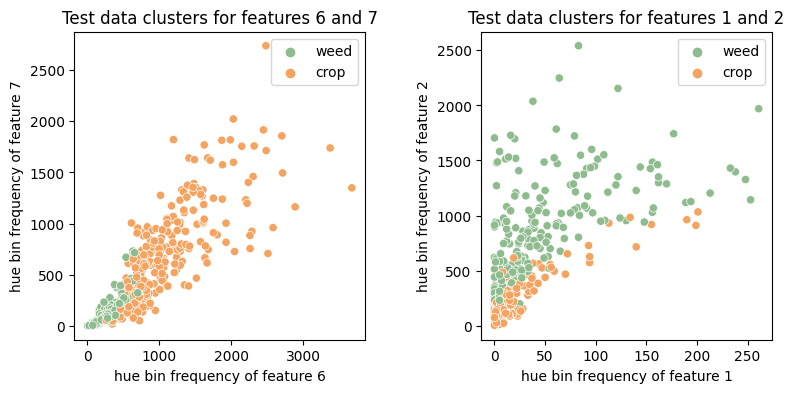

In [3]:
# initialize the cluster centers with the first two data points in training data
startingPoint = np.vstack((XTrain[0,],XTrain[1,]))

# perform k-means clustering with 2 clusters via Lloyd's algorithm
kmeans = KMeans(n_clusters=2, n_init=1, init=startingPoint, algorithm='lloyd').fit(XTrain)

# get values of cluster centers
cluster_centers = kmeans.cluster_centers_
print("Values of cluster centers:\n")
print("Cluster 0 (weed): ", cluster_centers[0], "\n")
print("Cluster 1 (crop): ", cluster_centers[1])

# predict cluster labels for test data
test_clusters = kmeans.predict(XTest)

# plot scatterplots of test split clusters
fig, ax = plt.subplots(1,2, figsize=(9, 4))

hue_labels = ['weed', 'crop']

sns.scatterplot(x= XTest[:, 6],y=XTest[:, 7], hue=test_clusters, palette=['darkseagreen','sandybrown'], ax=ax[0])
ax[0].set_title('Test data clusters for features 6 and 7')
ax[0].set_xlabel('hue bin frequency of feature 6')
ax[0].set_ylabel('hue bin frequency of feature 7')

sns.scatterplot(x= XTest[:, 1],y=XTest[:, 2], hue=test_clusters,  palette=['darkseagreen','sandybrown'], ax=ax[1])
ax[1].set_title('Test data clusters for features 1 and 2')
ax[1].set_xlabel('hue bin frequency of feature 1')
ax[1].set_ylabel('hue bin frequency of feature 2') 

# Add custom legend labels
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, hue_labels)
ax[1].legend(handles, hue_labels)


plt.subplots_adjust(wspace=0.4) # adjust horizontal space
plt.show()

<h4> <b> Explanation </b> </h4>

In this exercise, k-means clustering was performed using the k-means algorithm from scikit-learn, utilizing Lloyd's algorithm. Two cluster centers were initialized as the first two data points in the training data, and the algorithm was executed only once with these two centroid seeds. Essentially, k-means clustering computes the distance between the data points and the clusters and assigns the data points to the cluster with the nearest centroid. The centroids are then updated by calculating the mean of all the data points that were assigned to this cluster center. This process is repeated until a convergence criterion for the distances is met or after iteration 300 (which is the default maximum number of iterations here). After fitting the k-means clustering on the training data, we obtain the cluster centers for weed (cluster 0) and crop (cluster 1). Both represent centroids in a 13-dimensional space, representing the 13 features used to determine whether an image represents crop or merely weed (essentially the hue bin frequency of the features).

Then, the labels of the test data were predicted, and features 6 and 7, and 1 and 2 of the test data, respectively, were plotted against each other. In the first scatterplot, the hue bin frequency of feature 6 is plotted against the hue bin frequency of feature 7. We can observe that data points with low hue bin frequencies of both features belong to cluster 0 (weed), while higher hue bin frequencies generally are assigned to cluster 1 (crop). In the second scatterplot, the hue bin frequency of feature 1 was plotted against the hue bin frequency of feature 2. Generally, we can observe a tendency that data points with higher hue bin frequencies of feature 2 are generally assigned to cluster 0 (weed), while lower frequencies of feature 2 are rather assigned to cluster 1 (crop). However, these are just tendencies, we don't observe clear cuts or boundaries between the two clusters. Moreover, we might have obtained better clustering results if we would have run the algorithm several times with different randomly initialized centroids instead of using only the first two datapoints fromt he trainig data.

<h4> <b> Exercise 5 </b> </h4>

In [4]:
# read in the data
img = imread('dog.jpg')
img_size = img.shape
# Reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [5]:
startingPoint_list = np.unique(X, axis = 0) # list of unique starting points for the k-means clustering

k_values = [i for i in range(1, 11)] # k-values
k_inertia = [] # get WCSS values

# find optimal k by using elbow method
for i,k in enumerate(k_values):
    # run k-means clustering with k clusters
    kmeans = KMeans(n_clusters=k, algorithm='lloyd', n_init=1, init=startingPoint_list[:i+1]).fit(X)
    inertia = kmeans.inertia_ # get WCSS value
    k_inertia.append(inertia)

/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


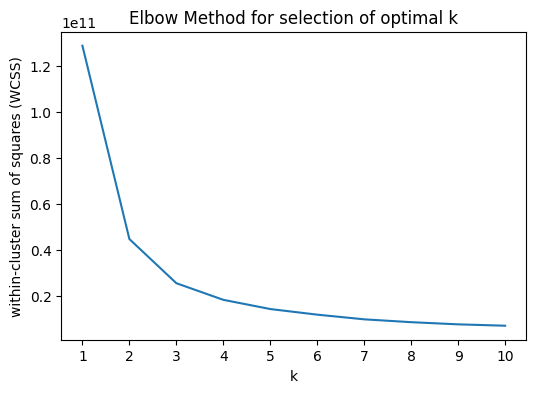

In [6]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=k_values, y=k_inertia) # plot k values and their corresponding inertia values
plt.title("Elbow Method for selection of optimal k")
plt.xlabel("k")
plt.xticks(k_values)
plt.ylabel("within-cluster sum of squares (WCSS)")
plt.show()

<h4> <b> Explanation: </b> </h4>

The plotted graph represents the Elbow Method, a technique used to determine the optimal number of clusters (k) in K-means clustering. In this method, we analyze the within-cluster sum of squares (WCSS) as a function of the number of clusters. Observing the graph, we note a substantial decrease in WCSS from approximately 1.3 * 10$^{-11}$ to 0.4 * 10$^{-11}$ as we increase k from 1 to 2. However, beyond k=3, where the WCSS hovers around 0.25 * 10$^{-11}$, the rate of decrease diminishes significantly. This phenomenon is typically referred to as the "elbow point" in the plot. At the elbow point, we face a trade-off: further reducing WCSS by increasing k may not significantly improve the clustering quality but could introduce overfitting, capturing noise rather than meaningful patterns in the data.
Consequently, based on the Elbow Method analysis, we conclude that k=3 is the optimal choice and proceed with using 3 clusters for the image segmentation.

Choosing the optimal k however, is not trivial and the Elbow Method comes with caveats. One reason why the elbow method might not be the best evaluation method could be that first of all, conducting the k-means algorithm for several clusters to obtain the inertia or WCSS value is computationally expensive, especially for data sets that require more clusters. Moreover, although in the plot above identifying the "elbow point" is more or less clear, it might not be the case for other datasets which could make identifying the elbow point challenging. Lastly, not neccesarily a caveat of the elbow method itself, but the optimal value of k can also depend on the exact use case or application. 

In case of image segmentation or compression, increasing the number of clusters results in a more fine grained segmentation that more and more would resemble the original image. Increasing the number of clusters however increases the computing cost. In the code snippet below an image of a dog was compressed with the help of 3-means clustering. The goal of image compression is to reduce the image's complexity, for example to facilitate storage, while keeping most of the image's features preserved. The elbow method tells us that k=3 is the optimal trade-off between minimizing the WCSS value and avoidng overfitting. However, as we can see in the compressed image below, segmenting it by three clusters results in an image that has three colours based on the cluster centroids. The compressed image resembles the original image but lacks detail and the colours of the original image. 

Depending on the use case, increasing the number of clusters sightly would results in an image that more resembles the original image in terms of colours, while still compressing it. In conclusion, the choice of k also depends on the specific use case of our application.

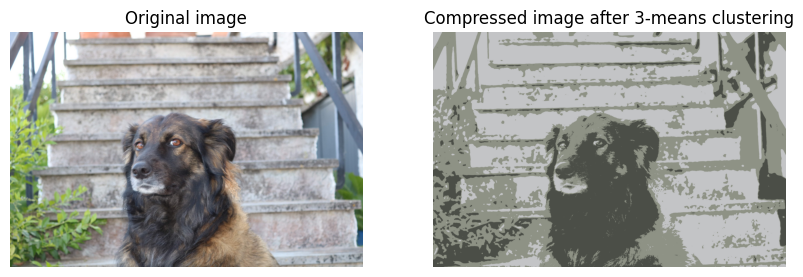

In [7]:
# run kmeans with optimal k estimated via elbow method (k=3)

kmeans = KMeans(n_clusters=3, algorithm='lloyd', n_init=1, init=startingPoint_list[:3]).fit(X)

img_clusters = kmeans.predict(X) # get cluster labels for pixels
cluster_centers = kmeans.cluster_centers_ # get cluster centers (values for RGB channels)

comp_img = np.empty_like(X) # create array for compressed image with the same shape as X
for i in range(len(comp_img)):
    comp_img[i] = cluster_centers[img_clusters[i]] # overwrite pixels with the values/colour of the assigned cluster
       
comp_img = comp_img.reshape(img_size) # reshape image back to 3D

# plot original and compressed image
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(img)
ax[0].set_title("Original image")
ax[0].axis('off')
ax[1].imshow(comp_img)
ax[1].set_title("Compressed image after 3-means clustering")
ax[1].axis('off')
plt.show()

<h4> <b> References </b> </h4>

Alemi, A., Poole, B., Fischer, I., Dillon, J., Saurous, R. A., & Murphy, K. (2018). Fixing a broken ELBO. In International conference on machine learning (pp. 159-168). PMLR.

Chater, N., & Manning, C. D. (2006). Probabilistic models of language processing and acquisition. Trends in cognitive sciences, 10(7), 335-344.

Hamelryck, T. (2023). An overview of BAyesian inference. Introduction to Data Science 2024. Lecture Slides.

Norris, D., McQueen, J. M., & Cutler, A. (2016). Prediction, Bayesian inference and feedback in speech recognition. Language, cognition and neuroscience, 31(1), 4-18.

ChatGPT version 3.5 was used as a writing tool to improve the writing of original content and to add custom legend labels in exercise 4. 


Note: Since I had version conflicts when I tried to update the new requirements.txt file and the python version to 3.10., I used python version 3.12.1 here.